In [27]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt
from tensorflow.keras.metrics import MeanSquaredError


1. Loading Dataset

In [15]:
data = pd.read_csv('abalone.csv')
print("Dataset Loaded Successfully!")
print(data.head())

Dataset Loaded Successfully!
  Sex  Length  Diameter  Height  Whole weight  Shucked weight  Viscera weight  \
0   M   0.455     0.365   0.095        0.5140          0.2245          0.1010   
1   M   0.350     0.265   0.090        0.2255          0.0995          0.0485   
2   F   0.530     0.420   0.135        0.6770          0.2565          0.1415   
3   M   0.440     0.365   0.125        0.5160          0.2155          0.1140   
4   I   0.330     0.255   0.080        0.2050          0.0895          0.0395   

   Shell weight  Rings  
0         0.150     15  
1         0.070      7  
2         0.210      9  
3         0.155     10  
4         0.055      7  


Split Features and Target

In [16]:
X = data.iloc[:, :-1]  # Features: All columns except the last one (Rings)
y = data.iloc[:, -1]   # Target: Rings

Preprocess Categorical Feature ('Sex') and Normalize Numerical Features

In [17]:
preprocessor = ColumnTransformer([
    ('ohe', OneHotEncoder(), ['Sex']),  # One-Hot Encode 'Sex'
    ('scale', StandardScaler(), ['Length', 'Diameter', 'Height', 'Whole weight',
                                  'Shucked weight', 'Viscera weight', 'Shell weight'])
], remainder='passthrough')

In [18]:
X = preprocessor.fit_transform(X)
print(f"Preprocessed Data Shape: {X.shape}")

Preprocessed Data Shape: (4177, 10)


Split Data into Training and Testing Sets

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Data Split: Training and Testing Sets Created.")

Data Split: Training and Testing Sets Created.


Build a Regression Model

In [28]:
model = models.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)  # Single output for regression
])
print("Model Architecture Built.")


Model Architecture Built.


Compile the Model

In [43]:
model.compile(optimizer='adam', loss='mse', metrics=['mae'])
print("Model Compiled with Adam Optimizer and MSE Loss.")

Model Compiled with Adam Optimizer and MSE Loss.


Train the Model

In [44]:
history = model.fit(X_train, y_train, epochs=50, validation_split=0.2, verbose=1)
print("Model Training Completed.")

Epoch 1/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 4.3865 - mae: 1.5017 - val_loss: 3.7609 - val_mae: 1.3823
Epoch 2/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.1405 - mae: 1.4425 - val_loss: 3.8571 - val_mae: 1.4351
Epoch 3/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5.0230 - mae: 1.5884 - val_loss: 3.9183 - val_mae: 1.4046
Epoch 4/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.3355 - mae: 1.4946 - val_loss: 3.7434 - val_mae: 1.3402
Epoch 5/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.5991 - mae: 1.5577 - val_loss: 3.8083 - val_mae: 1.3325
Epoch 6/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.5207 - mae: 1.5474 - val_loss: 3.7650 - val_mae: 1.3580
Epoch 7/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.9301 - mae: 1.4237 - val_loss: 3.7287 - val_mae: 1.3590
Epoch 8/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.2908 - mae: 1.4783 - val_loss: 3.8585 - val_mae: 1.4218
Epoch 9/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4.2346 - mae: 

Evaluate the Model on Test Data

In [46]:
test_loss, test_mae = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}, Test MAE: {test_mae}")

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4.5437 - mae: 1.5048
Test Loss: 4.462161064147949, Test MAE: 1.51246976852417


Save the Model

In [47]:
model.save('abalone_model.h5')
print("Model Saved as 'abalone_model.h5'.")

Model Saved as 'abalone_model.h5'.


Load the Saved Model

In [48]:
loaded_model = tf.keras.models.load_model('abalone_model.h5', custom_objects={'mse': tf.keras.losses.MeanSquaredError()})
print("Model Loaded Successfully.")


Model Loaded Successfully.


Make Predictions

In [49]:
predictions = loaded_model.predict(X_test[:5])
print("Predictions on Test Samples:", predictions.flatten())

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step
Predictions on Test Samples: [12.06894   9.450774 16.068472 11.388981 12.509101]


Compare Predictions with Actual Values

In [50]:
print("Actual Values:", y_test[:5].values)

Actual Values: [ 9  8 16  9 14]


Visualize Training History

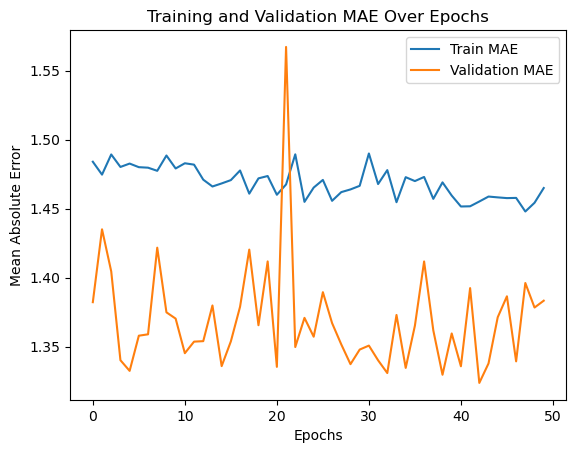

In [51]:
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Training and Validation MAE Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.show()

Visualize Predictions vs. Actual

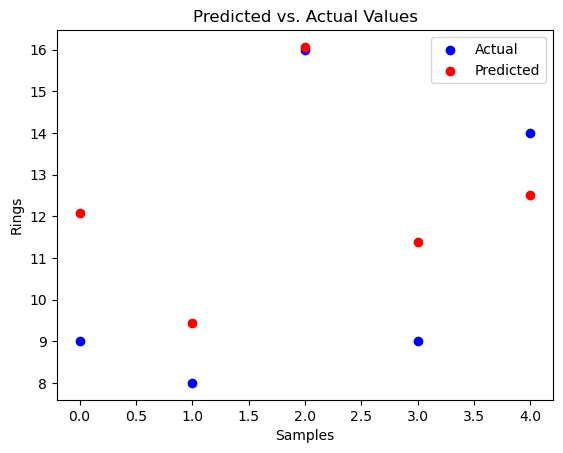

In [52]:
plt.scatter(range(5), y_test[:5], color='blue', label='Actual')
plt.scatter(range(5), predictions.flatten(), color='red', label='Predicted')
plt.title('Predicted vs. Actual Values')
plt.xlabel('Samples')
plt.ylabel('Rings')
plt.legend()
plt.show()

Print Model Summary

In [53]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 64)             │           704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,453 (33.02 KB)

 Trainable params: 2,817 (11.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 5,636 (22.02 KB)